In [44]:
import pandas as pd
import seaborn as sns

### Total results

In [45]:
df = pd.read_csv("TableEvents.tsv", sep = "\t")
df.head()

,Family,BranchType,Branch,Duplications,Transfers,Losses,Originations,copies,singletons,extinction_prob,presence,LL
0,SpeciesTree.nwk_78_prunedtree.nwk,S_terminal_branch,n10(0),0.0,0.0,0.0,0.0,2.0,2.0,0.000006,1.0,-48.6187
1,SpeciesTree.nwk_78_prunedtree.nwk,S_terminal_branch,n12(1),0.0,0.0,0.0,0.0,2.0,2.0,0.000006,1.0,-48.5446
2,SpeciesTree.nwk_78_prunedtree.nwk,S_terminal_branch,n13(2),0.0,0.0,0.0,0.0,2.0,2.0,0.000006,1.0,-48.4646
3,SpeciesTree.nwk_78_prunedtree.nwk,S_terminal_branch,n14(3),0.0,0.0,0.0,0.0,2.0,2.0,0.000006,1.0,-48.4646
4,SpeciesTree.nwk_78_prunedtree.nwk,S_terminal_branch,n15(4),0.0,0.0,0.0,0.0,2.0,2.0,0.000006,1.0,-48.6877


### Results per branch

In [46]:
dfb = df.groupby("Branch", as_index=False).sum()
dfb.head()

,Branch,Duplications,Transfers,Losses,Originations,copies,singletons,extinction_prob,presence,LL
0,10,0.62,0.14,0.07,0.00,185.70,184.38,1.434428,96.00,-4853.80210
1,11,24.71,12.88,1.99,0.45,211.94,154.31,1.434429,97.98,-4326.76760
2,12,85.83,22.82,1.15,4.51,213.44,49.95,1.434430,96.98,-3432.10555
3,13,1.64,4.23,3.73,0.70,184.04,177.53,1.434429,96.89,-4601.62320
4,14,0.00,0.13,0.03,0.00,185.01,184.88,1.442583,96.00,-4756.30210


### Inferring verticality (branch-wise metric)

In [47]:
dfb["Verticality"] = dfb["singletons"] / (dfb["singletons"] + dfb["Originations"] + dfb["Transfers"])

In [48]:
dfb.head()

,Branch,Duplications,Transfers,Losses,Originations,copies,singletons,extinction_prob,presence,LL,Verticality
0,10,0.62,0.14,0.07,0.00,185.70,184.38,1.434428,96.00,-4853.80210,0.999241
1,11,24.71,12.88,1.99,0.45,211.94,154.31,1.434429,97.98,-4326.76760,0.920484
2,12,85.83,22.82,1.15,4.51,213.44,49.95,1.434430,96.98,-3432.10555,0.646351
3,13,1.64,4.23,3.73,0.70,184.04,177.53,1.434429,96.89,-4601.62320,0.972980
4,14,0.00,0.13,0.03,0.00,185.01,184.88,1.442583,96.00,-4756.30210,0.999297


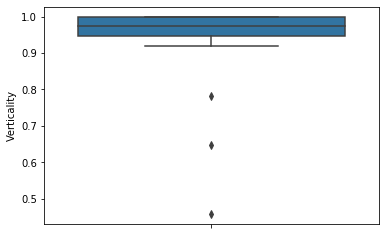

In [49]:
sns.boxplot(y = dfb["Verticality"])

### Inferring transfer propensity (family-wise metric)

In [50]:
dff = df.groupby("Family").sum()

In [51]:
dff["TransferPropensity"] = dff["Transfers"] / (dff["singletons"] + dff["Transfers"])

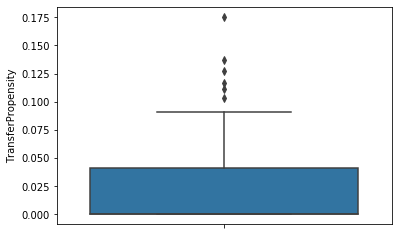

In [52]:
sns.boxplot(y = dff["TransferPropensity"])